In [18]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms import bipartite
import itertools 
%matplotlib notebook

In [81]:
# Import initial network
data = pd.read_excel('data_test.xlsx')
data = data.head(1000)
# Creating a bipartite graph
B = nx.from_pandas_edgelist(data, source='StockCode',  target='InvoiceNo', edge_attr='Quantity')
bipartite.is_bipartite(B)

True

In [100]:
# Generate projected graph G
I = set(data['StockCode'])
G = bipartite.weighted_projected_graph(B,I)

In [14]:
# # Draw projected graph G
# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos, with_labels=True, node_size=10,font_size=7,node_color='blue', label='Items')

<IPython.core.display.Javascript object>


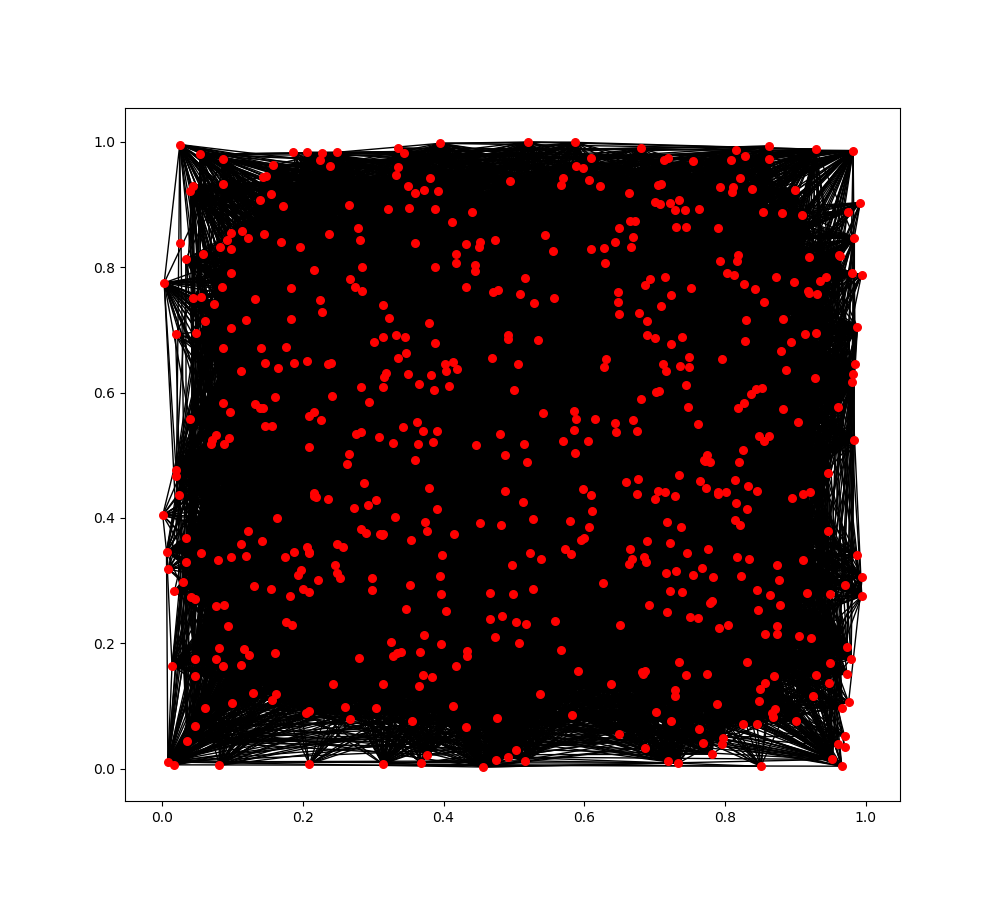

/root/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [83]:
# Draw the projected graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=30, font_size=5, node_color='red')

In [84]:
def edge_to_remove(G):
    dict1 = nx.edge_betweenness_centrality(G)
    list_of_tuples = sorted(dict1.items(), key = lambda x: x[1], reverse = True)
    return list_of_tuples[0][0]

In [85]:
def newman_girvan(G):
    c = nx.connected_component_subgraphs(G)
    l = len(list(c))
    print('There are {} connected components'.format(l))
    
    while l==1:
        G.remove_edge(*edge_to_remove(G))
        c = nx.connected_component_subgraphs(G)
        l = len(list(c))
        print('There are {} connected components'.format(l))
    return c

In [89]:
comp = newman_girvan(G)

There are 7 connected components


In [87]:
for i in list(c):
    print(i.nodes())
    print('*'*10)

In [97]:
comp = girvan_newman(G)

In [101]:
import itertools
k = 2
comp = girvan_newman(G)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities)) 

TypeError: '<' not supported between instances of 'str' and 'int'